In [1]:
import nltk
from nltk.corpus import gutenberg
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
import glob
import re
files = glob.glob(r'C:\Users\rajas\AppData\Roaming\nltk_data\corpora\gutenberg\bible-kjv.txt')

In [13]:
count = {}          #initialising a dictionary 
word = []          #initialising a list


for file in files:
    with open(file,'r') as exist:              # Reading the file and converting to lower case
        readfile = exist.read()
        lowertext = readfile.lower()
        text =  re.findall(r'\b[a-z]{3,15}\b', lowertext)  # eliminating the punctuations and numbers
    for word in text:
        if word.isalpha(): 
            if word not in count:
                count[word] = 1  # checks the word present or not
            else:
                count[word] += 1 # if exists, increment by 1

In [5]:
def ordered_words():        #sorts the words based on count        
    return sorted(count.items(), key=lambda x: x[1], reverse=True)  # usage of lambda function for sorting

In [18]:
import csv                 # create a new csv file and import data into it
newfile= open('C:/Users/rajas/Desktop/myfile.csv', 'w',newline="")
csvfile=csv.writer(newfile)
csvfile.writerow(['Word','Freq','Rank']) #adding headings for the coloumns
n=1
for x in ordered_words():                     #Insertion of data
    csvfile.writerow([x[0], x[1], n])   
    n +=1

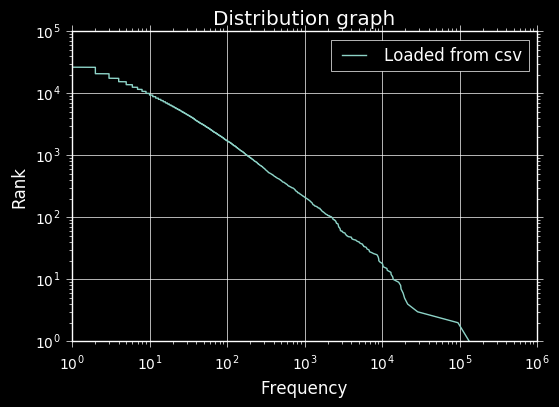

In [32]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('C:/Users/rajas/Desktop/myfile.csv','r') as csvfile:  # opens the csv file
    csvreader = csv.reader(csvfile)

    
    next(csvreader)    # reads the next line


    
    for row in csvreader:
        x.append(int(row[1]))                              # appending values to x axis
        y.append(int(row[2]))                            # appending values to y axis

plt.loglog(x,y,label='Loaded from csv')
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('Distribution graph')
plt.legend()
plt.show()

#  Conclusion: Implemented the Zipfs law with the help of above example